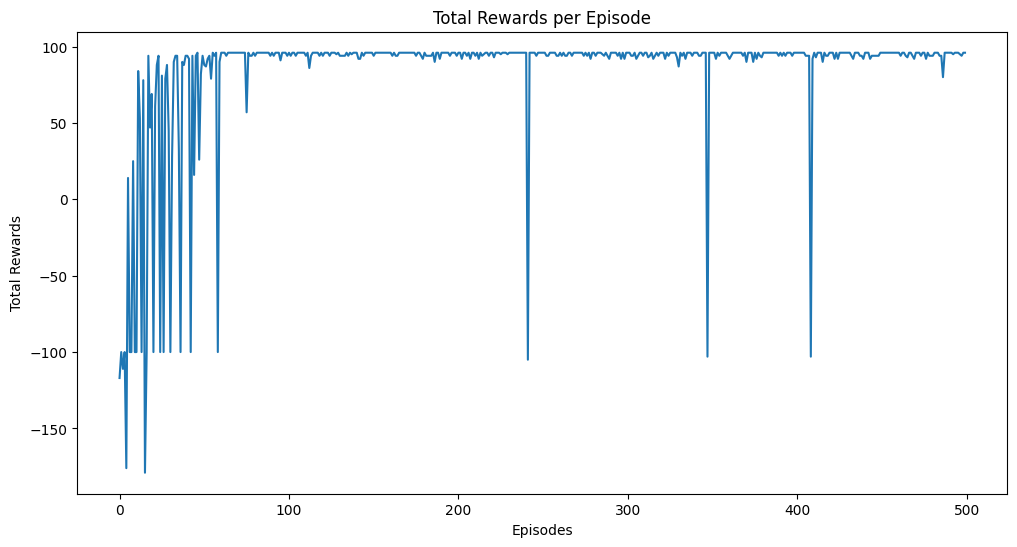

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self):
        self.height = 10
        self.width = 10
        self.grid = np.zeros((self.height, self.width)) - 1
        self.start_location = (4, np.random.randint(0, 5))
        self.current_location = self.start_location
        self.bomb_location = (1, 3)
        self.gold_location = (0, 3)
        self.terminal_states = [self.bomb_location, self.gold_location]
        self.grid[self.bomb_location] = -100
        self.grid[self.gold_location] = 100
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

    def agent_on_map(self):
        grid = np.zeros((self.height, self.width))
        grid[self.current_location[0], self.current_location[1]] = 1
        return grid

    def get_reward(self, new_location):
        return self.grid[new_location[0], new_location[1]]

    def is_terminal(self):
        return self.current_location in self.terminal_states

    def make_step(self, action):
        row, col = self.current_location
        if action == 'UP' and row > 0:
            row -= 1
        elif action == 'DOWN' and row < self.height - 1:
            row += 1
        elif action == 'LEFT' and col > 0:
            col -= 1
        elif action == 'RIGHT' and col < self.width - 1:
            col += 1
        self.current_location = (row, col)
        return self.get_reward(self.current_location)

    def reset(self):
        self.current_location = self.start_location
        return self.current_location

class QLearningAgent:
    def __init__(self, actions):
        self.q_table = {}
        self.actions = actions
        self.alpha = 0.1
        self.gamma = 0.99
        self.epsilon = 0.1

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0)

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.actions)
        else:
            q_values = [self.get_q_value(state, action) for action in self.actions]
            max_q_value = max(q_values)
            return np.random.choice([self.actions[i] for i in range(len(self.actions)) if q_values[i] == max_q_value])

    def learn(self, state, action, reward, next_state):
        old_q_value = self.get_q_value(state, action)
        future_rewards = [self.get_q_value(next_state, next_action) for next_action in self.actions]
        best_future_reward = max(future_rewards)
        new_q_value = old_q_value + self.alpha * (reward + self.gamma * best_future_reward - old_q_value)
        self.q_table[(state, action)] = new_q_value

def play(env, agent, trials=500, max_steps_per_episode=100):
    rewards = []
    for trial in range(trials):
        total_reward = 0
        state = env.reset()
        for _ in range(max_steps_per_episode):
            action = agent.choose_action(state)
            reward = env.make_step(action)
            total_reward += reward
            next_state = env.current_location
            agent.learn(state, action, reward, next_state)
            state = next_state
            if env.is_terminal():
                break
        rewards.append(total_reward)
    return rewards

env = GridWorld()
agent = QLearningAgent(env.actions)
rewards = play(env, agent)

plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.xlabel('Епізоди')
plt.ylabel('Винагороди')
plt.show()


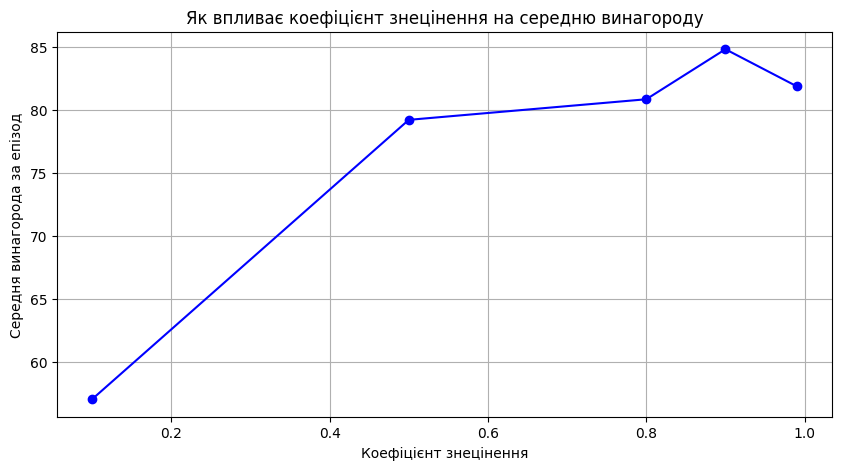

Gamma values: [0.1, 0.5, 0.8, 0.9, 0.99]
Average Rewards: [57.008, 79.23, 80.868, 84.848, 81.902]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self):
        self.height = 10
        self.width = 10
        self.grid = np.zeros((self.height, self.width)) - 1
        self.start_location = (4, np.random.randint(0, 5))
        self.current_location = self.start_location
        self.bomb_location = (1, 3)
        self.gold_location = (0, 3)
        self.terminal_states = [self.bomb_location, self.gold_location]
        self.grid[self.bomb_location] = -100
        self.grid[self.gold_location] = 100
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

    def agent_on_map(self):
        grid = np.zeros((self.height, self.width))
        grid[self.current_location[0], self.current_location[1]] = 1
        return grid

    def get_reward(self, new_location):
        return self.grid[new_location[0], new_location[1]]

    def is_terminal(self):
        return self.current_location in self.terminal_states

    def make_step(self, action):
        row, col = self.current_location
        if action == 'UP' and row > 0:
            row -= 1
        elif action == 'DOWN' and row < self.height - 1:
            row += 1
        elif action == 'LEFT' and col > 0:
            col -= 1
        elif action == 'RIGHT' and col < self.width - 1:
            col += 1
        self.current_location = (row, col)
        return self.get_reward(self.current_location)

    def reset(self):
        self.current_location = self.start_location
        return self.current_location

class QLearningAgent:
    def __init__(self, actions, gamma):
        self.q_table = {}
        self.actions = actions
        self.alpha = 0.1
        self.gamma = gamma
        self.epsilon = 0.1

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0)

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.actions)
        else:
            q_values = [self.get_q_value(state, action) for action in self.actions]
            max_q_value = max(q_values)
            return np.random.choice([self.actions[i] for i in range(len(self.actions)) if q_values[i] == max_q_value])

    def learn(self, state, action, reward, next_state):
        old_q_value = self.get_q_value(state, action)
        future_rewards = [self.get_q_value(next_state, next_action) for next_action in self.actions]
        best_future_reward = max(future_rewards)
        new_q_value = old_q_value + self.alpha * (reward + self.gamma * best_future_reward - old_q_value)
        self.q_table[(state, action)] = new_q_value

def play(env, agent, trials=500, max_steps_per_episode=100):
    rewards = []
    for trial in range(trials):
        total_reward = 0
        state = env.reset()
        for _ in range(max_steps_per_episode):
            action = agent.choose_action(state)
            reward = env.make_step(action)
            total_reward += reward
            next_state = env.current_location
            agent.learn(state, action, reward, next_state)
            state = next_state
            if env.is_terminal():
                break
        rewards.append(total_reward)
    return np.mean(rewards)

gammas = [0.1, 0.5, 0.8, 0.9, 0.99]
average_rewards = []

for gamma in gammas:
    env = GridWorld()
    agent = QLearningAgent(env.actions, gamma)
    avg_reward = play(env, agent)
    average_rewards.append(avg_reward)

plt.figure(figsize=(10, 5))
plt.plot(gammas, average_rewards, marker='o', linestyle='-', color='b')
plt.xlabel('Коефіцієнт знецінення')
plt.ylabel('Середня винагорода за епізод')
plt.title('Як впливає коефіцієнт знецінення на середню винагороду')
plt.grid(True)
plt.show()

print("Gamma values:", gammas)
print("Average Rewards:", average_rewards)
